In [2]:
from Game import*

Version:  0.2.27


In [3]:
def initial_state():
    state=Board(4,5)
    
    for i in range(20):
        state [i]=1


    
    return state

In [4]:
initial_state()

 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 

In [5]:
state=initial_state()

In [6]:
state.show_locations()

 0  1  2  3  4 
 5  6  7  8  9 
10 11 12 13 14 
15 16 17 18 19 



In [7]:
def update_state(state,player,move):
    #a move is a start and end location
    new_state=state
    
    start_row,start_col=state.rc_from_index(move)
    
    for c in range(start_col,5):
        for r in range(start_row,4):
            new_state[r,c]=0
    
    return new_state

In [8]:
def show_state(state):
    print(state)

In [9]:
show_state(state)

 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 



In [10]:
state=initial_state()
show_state(state)

 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 



In [11]:
def valid_moves(state,player):
    moves=[]
    for location in range(20):
        if state[location]==1:
            moves.append(location)
    return moves


In [12]:
show_state(state)
valid_moves(state,2)

 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [13]:
state=initial_state()
state

 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 

In [14]:
valid_moves(state,1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [15]:
def win_status(state,player):
    if state[0]==0:
        return "lose"

In [16]:
# agents and human moves 

def random_move(state,player):
    moves=valid_moves(state,player)
    moves.remove(0)

    if not moves:
        return 0
    else:
        return random.choice(moves)
    
    
def human_move(state,player):
    
    state.show_locations()
    move=int(input("What square do you want to eat?"))
    
    
    return move
    


random_agent=Agent(random_move)
human_agent=Agent(human_move)

        

In [17]:
initial_state()

 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 

In [18]:
show_state(state)
valid_moves(state,1)

 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [19]:
state=initial_state()
show_state(state)

 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 



In [20]:
g=Game()
g.run()

TypeError: run() missing 2 required positional arguments: 'agent1' and 'agent2'

In [21]:
valid_moves(state,1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [22]:
valid_moves(state,2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [23]:
from Game.minimax import*
def minimax_move(state,player):
    values,moves=minimax_values(state,player,display=True)
    return top_choice(moves,values)

minimax_agent=Agent(minimax_move)

In [24]:
state.show_locations()

 0  1  2  3  4 
 5  6  7  8  9 
10 11 12 13 14 
15 16 17 18 19 



In [25]:
state=initial_state()

In [26]:
def skittles_move(state, player, info):
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    if state not in T:
        actions=valid_moves(state,player)
        T[state]=Table()
        for action in actions:
            T[state][action]=2 #initial number of skittles
    
    move=weighted_choice(T[state])
    
    if move is None:
        # learn
        if learning:
            if last_state:
                T[last_state][last_action]-=1 #take away a skittle
                if T[last_state][last_action]<0:
                    T[last_state][last_action]=0
        
        return random_move(state,player)
    else:
        return move

In [27]:
def skittles_after(status,player,info):
    #not return anything but
    #will adjust the skittles table if lost the game
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    if status=='lose':
        T[last_state][last_action]-=1 #take away a skittle
        if T[last_state][last_action]<0:
            T[last_state][last_action]=0

In [28]:
skittles_agent=Agent(skittles_move)
skittles_agent.post=skittles_after
skittles_agent.T=Table()   #makes an empty table
skittles_agent.learning=True

In [29]:
%%time
N_train=5
N_test=100

percentage_player1_wins=[]
percentage_player2_wins=[]
percentage_ties=[]
total_number_of_games=[]

skittles_agent.T = Table()

current_game_number=0

for i in range(100):
    
    skittles_agent.learning=True
    g=Game(number_of_games=N_train)
    g.display=False
    g.run(random_agent,skittles_agent)
    
    current_game_number+=N_train

    skittles_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    results=g.run(random_agent,skittles_agent)
    
    percentage_player1_wins.append(results.count(1))
    percentage_player2_wins.append(results.count(2))
    percentage_ties.append(results.count(0))
    total_number_of_games.append(current_game_number)

Wall time: 59.6 s


In [33]:
%%time
skittles_agent.learning=True
g=Game(number_of_games=50)
g.display=False
results=g.run(random_agent,skittles_agent)
results

Wall time: 341 ms


[1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [58]:
%matplotlib inline
from matplotlib.pylab import figure,plot,legend,xlabel, ylabel

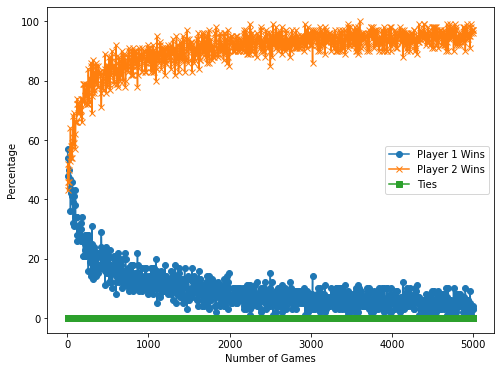

In [59]:
figure(figsize=(8,6))
plot(total_number_of_games,percentage_player1_wins,'-o', label="Player 1 Wins")
plot(total_number_of_games,percentage_player2_wins,'-x', label="Player 2 Wins")
plot(total_number_of_games,percentage_ties,'-s', label="Ties")
xlabel('Number of Games')
ylabel('Percentage')
legend()

In [34]:
g=Game()
g.run(human_agent,skittles_agent)

====
Game  1
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 

 0  1  2  3  4 
 5  6  7  8  9 
10 11 12 13 14 
15 16 17 18 19 



What square do you want to eat? 12


Player 1 moves 12
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  0  0  0 
 1  1  0  0  0 

Player 2 moves 8
 1  1  1  1  1 
 1  1  1  0  0 
 1  1  0  0  0 
 1  1  0  0  0 

 0  1  2  3  4 
 5  6  7  8  9 
10 11 12 13 14 
15 16 17 18 19 



What square do you want to eat? 7


Player 1 moves 7
 1  1  1  1  1 
 1  1  0  0  0 
 1  1  0  0  0 
 1  1  0  0  0 

Player 2 moves 15
 1  1  1  1  1 
 1  1  0  0  0 
 1  1  0  0  0 
 0  0  0  0  0 

 0  1  2  3  4 
 5  6  7  8  9 
10 11 12 13 14 
15 16 17 18 19 



What square do you want to eat? 10


Player 1 moves 10
 1  1  1  1  1 
 1  1  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

Player 2 moves 4
 1  1  1  1  0 
 1  1  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

 0  1  2  3  4 
 5  6  7  8  9 
10 11 12 13 14 
15 16 17 18 19 



What square do you want to eat? 1


Player 1 moves 1
 1  0  0  0  0 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

Player 2 moves 0
 1  0  0  0  0 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

Player  1 won.


[1]